# Predicting 2026 Home Runs

In [1]:
folder_path = "/Users/johnydc/Downloads/Tigers"  # Change this depending on your system path
raw_data = folder_path + "/data/raw/"
processed_data = folder_path + "/data/processed/"

## Loading Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
print("Loading Data ...\n")
stats = pd.read_csv(raw_data + "stats.csv")
stats = stats.rename(columns={"last_name, first_name": "name", "player_age": "age"})
stats

Loading Data ...



,name,player_id,year,age,ab,pa,home_run,strikeout,walk,k_percent,...,vertical_swing_path,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
0,"Pujols, Albert",405395,2021,41,275,296,17,45,14,15.2,...,NaN,90.3,12.0,29.3,9.1,39.7,100.714356,94.638800,21.7,47.1
1,"Cabrera, Miguel",408234,2021,38,472,526,15,118,40,22.4,...,NaN,91.4,10.0,32.8,8.3,49.0,101.953387,95.613068,25.8,49.4
2,"Molina, Yadier",425877,2021,38,440,473,11,79,24,16.7,...,NaN,88.0,15.3,34.1,5.2,31.6,97.653775,92.936144,24.0,57.1
3,"Suzuki, Kurt",435559,2021,37,219,247,6,44,12,17.8,...,NaN,85.2,14.6,28.9,3.9,27.2,95.984336,91.998129,21.7,49.0
4,"Cruz, Nelson",443558,2021,40,513,584,32,126,51,21.6,...,NaN,92.9,11.8,31.8,13.6,52.5,105.497885,97.364589,30.7,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,"Keaschall, Luke",807712,2025,22,182,207,4,29,19,14.0,...,35.6,86.2,10.5,38.3,5.2,31.2,97.107229,92.654309,18.5,42.0
1791,"Shaw, Matt",807713,2025,23,393,437,13,94,38,21.5,...,26.8,84.9,13.4,35.3,6.9,29.4,96.793366,92.432073,22.5,48.0
1792,"Yoshida, Masataka",807799,2025,31,188,205,4,24,10,11.7,...,32.8,90.2,5.7,29.2,6.5,44.0,100.498389,94.589775,15.4,44.5
1793,"Lee, Jung Hoo",808982,2025,26,560,617,8,71,47,11.5,...,39.4,87.1,9.9,34.1,3.7,32.0,97.154749,92.638544,13.1,44.7


In [4]:
# Separate identifiers from feature columns
names = stats['name']
idx = stats['player_id']                        
identifiers = stats[['name', 'player_id']]

# Feature matrix for modeling
df = stats.drop(columns=['name', 'player_id'])

## EDA

### Info

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1795 non-null   int64  
 1   age                  1795 non-null   int64  
 2   ab                   1795 non-null   int64  
 3   pa                   1795 non-null   int64  
 4   home_run             1795 non-null   int64  
 5   strikeout            1795 non-null   int64  
 6   walk                 1795 non-null   int64  
 7   k_percent            1795 non-null   float64
 8   bb_percent           1795 non-null   float64
 9   batting_avg          1795 non-null   float64
 10  slg_percent          1795 non-null   float64
 11  on_base_percent      1795 non-null   float64
 12  on_base_plus_slg     1795 non-null   float64
 13  xba                  1795 non-null   float64
 14  xslg                 1795 non-null   float64
 15  xwoba                1795 non-null   float64
 16 

### Exploring Correlation Values

In [6]:
corrs = df.corr()['home_run'].drop('home_run') 
print("Correlation Values:\n")
print(corrs)

Correlation Values:

year                   0.005119
age                    0.028380
ab                     0.669646
pa                     0.693646
strikeout              0.705160
walk                   0.658859
k_percent              0.100581
bb_percent             0.299369
batting_avg            0.295864
slg_percent            0.800917
on_base_percent        0.414168
on_base_plus_slg       0.729442
xba                    0.329021
xslg                   0.772136
xwoba                  0.689555
xobp                   0.440001
xiso                   0.795998
avg_swing_speed        0.507439
fast_swing_rate        0.506915
blasts_contact         0.552086
blasts_swing           0.526712
squared_up_contact    -0.082547
squared_up_swing      -0.135616
avg_swing_length       0.352898
swords                 0.351149
attack_angle           0.279141
attack_direction      -0.178889
ideal_angle_rate       0.195104
vertical_swing_path    0.050746
exit_velocity_avg      0.590708
launch_angle_avg   

#### Negative Correlated Features

In [7]:
negative_corrs = corrs[corrs < 0]     
print("Negatively Correlated Features:\n")
print(negative_corrs)

Negatively Correlated Features:

squared_up_contact   -0.082547
squared_up_swing     -0.135616
attack_direction     -0.178889
swing_percent        -0.042134
Name: home_run, dtype: float64


#### Top 10 Correlated Features

In [8]:
corrs_sort = corrs.abs().sort_values(ascending=False)  
top10 = corrs_sort.head(10)                           
print("Top 10 Correlation Values:\n")
print(top10)

Top 10 Correlation Values:

slg_percent           0.800917
xiso                  0.795998
xslg                  0.772136
on_base_plus_slg      0.729442
barrel_batted_rate    0.717548
strikeout             0.705160
pa                    0.693646
xwoba                 0.689555
ab                    0.669646
walk                  0.658859
Name: home_run, dtype: float64


#### Strongly Correlated Features

In [9]:
strong_corrs = corrs[corrs > 0.595]       # Strong correlation --> 0.6
strong_features = strong_corrs.index      # Saving the features without their respective values
print("Strongly Correlated Features:\n")  
print(strong_corrs)

Strongly Correlated Features:

ab                    0.669646
pa                    0.693646
strikeout             0.705160
walk                  0.658859
slg_percent           0.800917
on_base_plus_slg      0.729442
xslg                  0.772136
xwoba                 0.689555
xiso                  0.795998
barrel_batted_rate    0.717548
avg_best_speed        0.617945
avg_hyper_speed       0.624201
Name: home_run, dtype: float64


### Summary Statistics

#### Features

In [10]:
print("Summary statistics with improved readability:\n")
df.describe().T

Summary statistics with improved readability:



,count,mean,std,min,25%,50%,75%,max
year,1795.0,2022.988301,1.409229,2021.000000,2022.000000,2023.000000,2024.000000,2025.000000
age,1795.0,28.173816,3.647036,20.000000,25.000000,28.000000,31.000000,42.000000
ab,1795.0,394.484123,131.054820,166.000000,281.000000,388.000000,504.500000,671.000000
pa,1795.0,441.256825,147.919139,200.000000,312.000000,433.000000,567.000000,753.000000
home_run,1795.0,14.268524,9.630480,0.000000,7.000000,12.000000,20.000000,62.000000
strikeout,1795.0,96.460167,37.011025,12.000000,68.000000,93.000000,120.000000,221.000000
walk,1795.0,37.728134,20.220238,3.000000,23.000000,33.000000,49.000000,145.000000
k_percent,1795.0,22.367799,6.027443,3.100000,18.200000,22.300000,26.400000,42.800000
bb_percent,1795.0,8.389582,2.934658,1.400000,6.300000,8.200000,10.300000,23.200000
batting_avg,1795.0,0.246295,0.030912,0.143000,0.226000,0.247000,0.266000,0.354000


#### Target Variable

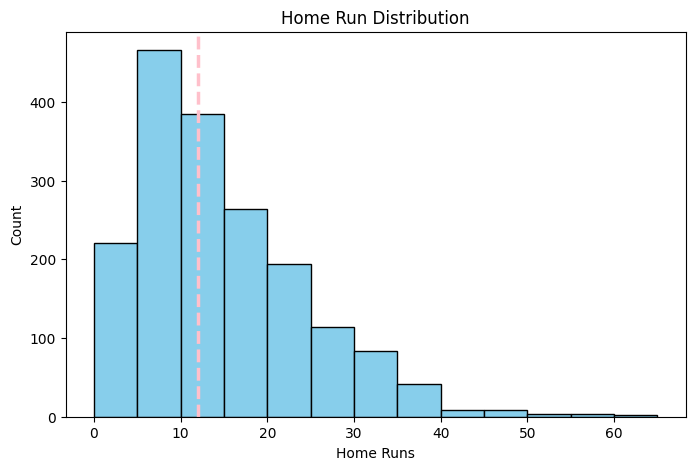

In [11]:
bins = np.arange(0, 70, 5)           # Setting bin width to 5; Max of 65 home runs (Aaron Judge)
median = np.median(df['home_run'])   # Calculating median

plt.figure(figsize=(8, 5))
plt.title('Home Run Distribution')
plt.hist(df['home_run'], bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Home Runs')
plt.ylabel('Count')
plt.axvline(median, color='pink', linestyle='--', linewidth=2.5)  # Adding vertical line to represent median
plt.show()

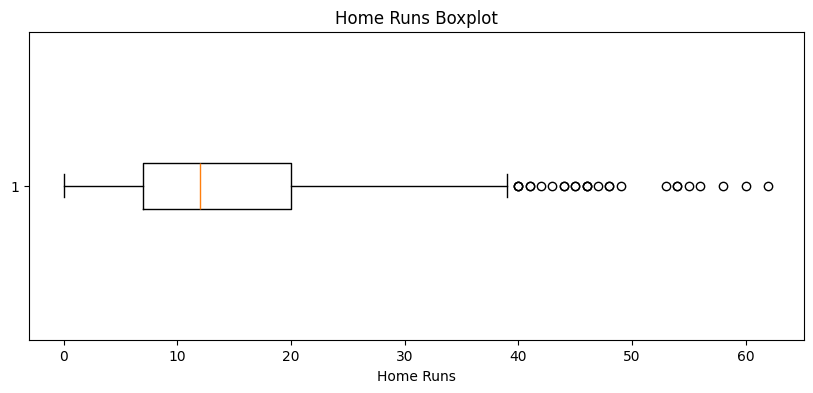

In [12]:
plt.figure(figsize=(10, 4))
plt.title('Home Runs Boxplot')
plt.boxplot(df['home_run'], vert=False)
plt.xlabel('Home Runs')
plt.show()

### Missing Values

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [14]:
na = df.isna().sum()   # Calculating number of missing values for each feature
print("Columns with Missing Values:\n")
print(na[na > 0])

Columns with Missing Values:

avg_swing_speed        723
fast_swing_rate        723
blasts_contact         723
blasts_swing           723
squared_up_contact     723
squared_up_swing       723
avg_swing_length       723
swords                 723
attack_angle           723
attack_direction       723
ideal_angle_rate       723
vertical_swing_path    723
dtype: int64


In [15]:
rows_with_na = df[df.isna().any(axis=1)]  # Extracing rows with one or more missing values in any column 
missing_cols = na[na > 0].index           # Extracting the column names with missing values

for column in missing_cols:
    temp_df = rows_with_na[rows_with_na[column].isna() == 1]                             # Extracting rows where the given feature is missing
    print(f"The years with missing values from {column} are", temp_df['year'].unique())  # Printing the years where missing values are present

The years with missing values from avg_swing_speed are [2021 2022 2023]
The years with missing values from fast_swing_rate are [2021 2022 2023]
The years with missing values from blasts_contact are [2021 2022 2023]
The years with missing values from blasts_swing are [2021 2022 2023]
The years with missing values from squared_up_contact are [2021 2022 2023]
The years with missing values from squared_up_swing are [2021 2022 2023]
The years with missing values from avg_swing_length are [2021 2022 2023]
The years with missing values from swords are [2021 2022 2023]
The years with missing values from attack_angle are [2021 2022 2023]
The years with missing values from attack_direction are [2021 2022 2023]
The years with missing values from ideal_angle_rate are [2021 2022 2023]
The years with missing values from vertical_swing_path are [2021 2022 2023]


In [16]:
samples21_22 = df[(df['year'] == 2021) | (df['year'] == 2022)].shape[0]  # Number of rows from the 2021 or 2022 season
print(f"We have {samples21_22} data samples from 2021-2022. Which is almost the same number of missing values we have in the columns above.")

We have 720 data samples from 2021-2022. Which is almost the same number of missing values we have in the columns above.


**It appears some columns have missing values from the years 2021 and 2022 where the given statistics may not have been available yet. Given this information, I think it would be best if we imputed the missing values by using the rest of the data from 2021 and 2022, while also inlcuding a boolean column that states whether or not we imputed some columns.**

In [17]:
samples23 = df[(df['year'] == 2023)]     # Data from the 2023 season

print("3 Samples from 2023 with Missing Values:\n")
samples23[samples23.isna().any(axis=1)]  # Extracting the rows from the 2023 season where missing values are present 

3 Samples from 2023 with Missing Values:



,year,age,ab,pa,home_run,strikeout,walk,k_percent,bb_percent,batting_avg,...,vertical_swing_path,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,hard_hit_percent,avg_best_speed,avg_hyper_speed,whiff_percent,swing_percent
772,2023,31,214,228,2,36,10,15.8,4.4,0.299,...,NaN,87.5,8.6,34.8,3.9,33.7,97.288580,92.735387,18.8,54.8
1045,2023,23,256,304,7,61,38,20.1,12.5,0.195,...,NaN,86.8,16.6,32.0,6.0,31.5,97.543796,92.819102,22.3,44.4
1072,2023,25,231,260,9,31,25,11.9,9.6,0.247,...,NaN,89.3,17.4,37.8,7.5,40.3,99.993888,94.167853,17.4,46.5


In [18]:
missing2023 = np.array(samples23[samples23.isna().any(axis=1)].index)  # Extracting the indices where missing values are present from the 2023 season

#### Imputation

In [19]:
impute_col = []
for col in missing_cols:
    if corrs[col] >= 0.5:       # Setting the threshold to 0.5 correlation value
        impute_col.append(col)  # Append column to impute
    
print("Impute these columns:", impute_col)

Impute these columns: ['avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing']


In [20]:
df['imputed'] = np.where((df['year'] == 2021) | (df['year'] == 2022), 1, 0)  # Setting imputed value to 1 for the 2021 and 2022 seasons; else 0
df.loc[missing2023, 'imputed'] = 1                                           # Setting imputed value to 1 for the indices with missing values

In [21]:
col = 'avg_swing_speed'
predictor_cols = df.drop(columns=missing_cols).columns

scaler = StandardScaler()
scaled_predictors = pd.DataFrame(
    scaler.fit_transform(df[predictor_cols]),  # Scaling the predictor variables
    columns=predictor_cols,                    
    index=df.index)

temp = scaled_predictors.copy()  # Storing our scaled predictor variables in a temporary dataframe
temp[col] = df[col]              # Copying data 

rf = RandomForestRegressor()                                                     # Initializing a Random Forest model
imputer = IterativeImputer(estimator=rf, max_iter=5, initial_strategy='median')  # Initializing an Iterative Imputer using a Random Forest to impute the missing values

imputed = imputer.fit_transform(temp)                                     # Predicts missing values by using the Random Forest generated from known values
imputed_df = pd.DataFrame(imputed, columns=temp.columns, index=df.index)  # Converting imputed values into dataframe
df[col] = imputed_df[col]                                                 # Copying imputed column into original dataframe

/Users/johnydc/Downloads/Tigers/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:867: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
col = 'fast_swing_rate'

temp = scaled_predictors.copy()  # Storing our scaled predictor variables in a temporary dataframe
temp[col] = df[col]              # Copying data

rf = RandomForestRegressor()                                                     # Initializing a Random Forest model
imputer = IterativeImputer(estimator=rf, max_iter=5, initial_strategy='median')  # Initializing an Iterative Imputer using a Random Forest to impute the missing values

imputed = imputer.fit_transform(temp)                                     # Predicts missing values by using the Random Forest generated from known values
imputed_df = pd.DataFrame(imputed, columns=temp.columns, index=df.index)  # Converting imputed values into dataframe
df[col] = imputed_df[col]                                                 # Copying imputed column into original dataframe

/Users/johnydc/Downloads/Tigers/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:867: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
col = 'blasts_contact'

temp = scaled_predictors.copy()  # Storing our scaled predictor variables in a temporary dataframe
temp[col] = df[col]              # Copying data

rf = RandomForestRegressor()                                                     # Initializing a Random Forest model
imputer = IterativeImputer(estimator=rf, max_iter=5, initial_strategy='median')  # Initializing an Iterative Imputer using a Random Forest to impute the missing values

imputed = imputer.fit_transform(temp)                                     # Predicts missing values by using the Random Forest generated from known values
imputed_df = pd.DataFrame(imputed, columns=temp.columns, index=df.index)  # Converting imputed values into dataframe
df[col] = imputed_df[col]                                                 # Copying imputed column into original dataframe

/Users/johnydc/Downloads/Tigers/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:867: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [24]:
col = 'blasts_swing'

temp = scaled_predictors.copy()  # Storing our scaled predictor variables in a temporary dataframe
temp[col] = df[col]              # Copying data

rf = RandomForestRegressor()                                                     # Initializing a Random Forest model
imputer = IterativeImputer(estimator=rf, max_iter=5, initial_strategy='median')  # Initializing an Iterative Imputer using a Random Forest to impute the missing values

imputed = imputer.fit_transform(temp)                                     # Predicts missing values by using the Random Forest generated from known values
imputed_df = pd.DataFrame(imputed, columns=temp.columns, index=df.index)  # Converting imputed values into dataframe
df[col] = imputed_df[col]                                                 # Copying imputed column into original dataframe

/Users/johnydc/Downloads/Tigers/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:867: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
print("Number of Imputed Rows:\n")
print(df['imputed'].value_counts())

Number of Imputed Rows:

imputed
0    1072
1     723
Name: count, dtype: int64


#### Removing Columns

In [26]:
df = df.dropna(axis=1)

**The combination of low correlation value, an abundance of features for the model, and the computational cost of accurately imputing the missing values has led to me deciding it is appropriate to drop the rest of the columns with missing values**

## Data Preparation

### Training / Validation

In [27]:
# Retrieving the "start index" for each year present in our dataset
start_idx_2022 = np.min(np.array(stats[stats['year'] == 2022].index))
start_idx_2023 = np.min(np.array(stats[stats['year'] == 2023].index))
start_idx_2024 = np.min(np.array(stats[stats['year'] == 2024].index))
start_idx_2025 = np.min(np.array(stats[stats['year'] == 2025].index))

In [28]:
train_indices = []
for name in names.unique():                                     # Looping through each name in the data
    player_indices = np.array(names[names == name].index)       # Extracting indices for each player
    first_idx = player_indices[0]
    last_idx = player_indices[-1]
    
    if first_idx == last_idx and first_idx >= start_idx_2025:   # Check if 2025 is the only data
        continue                                                # Skip, since there is no data to train from
    
    if last_idx >= start_idx_2025:                              # Check if the player had stats from the 2025 season
        train_indices.append(player_indices)                    # Add the corresponding indices to train

In [29]:
X_train_val_indices = []
y_train_val_indices = []

placeholder = -1
years = [2021, 2022, 2023, 2024]
for player in train_indices:                            # Iterating through each set of indices
    years_present = stats.loc[player, 'year'].tolist()  # Storing the years where data is available for the given player
    temp_indices = []                                   # Temporary array for our training indices to be stored
    count = 0                                           # Keeps count of the number of data rows available for the player
    
    for year in years:                                  # Iterating through all of the possible training years
        if year in years_present:                       # Cross-checking with the player's data
            temp_indices.append(player[count])          # Add the corresponding index
            count += 1                                  # Increase the count to add the next index
        
        else:                                           # Check if a year is missing
            temp_indices.append(placeholder)            # Mark it missing using a placeholder (-1)
    X_train_val_indices.append(temp_indices)            # Add temporary array to X_train_val
    y_train_val_indices.append(player[-1])              # Add 2025 season index for each player to y_train_val

In [30]:
np.save(processed_data + 'train:val:test/X_train_val_indices.npy', X_train_val_indices)
np.save(processed_data + 'train:val:test/y_train_val_indices.npy', y_train_val_indices)

### Splitting the Data

In [31]:
from sklearn.model_selection import KFold

In [32]:
kf = KFold(n_splits=8, shuffle=True)          # KFold Cross-Validation to split data into 8 folds; data is shuffled before splitting
splits = list(kf.split(X_train_val_indices))  # Generates all train_val splits using KFold
train_idx, val_idx = splits[0]                # Extracting the train_val split for the first fold

In [33]:
np.save(processed_data + 'train:val:test/train_idx.npy', train_idx)
np.save(processed_data + 'train:val:test/val_idx.npy', val_idx)

In [34]:
train_df = df.drop(columns=['year'])  
X_train = []                                                    

for sample_idx in train_idx:
    player_idx = X_train_val_indices[sample_idx]
    player_seq = []
    for index in player_idx:
        if index == placeholder:                                # Player has missing data for the year
            player_seq.append(np.zeros(len(train_df.columns)))  # Fill in the player sequence with all zeros
        
        else:                                                   # Player has valid data for the year
            player_seq.append(train_df.loc[index].to_numpy())   # Add corresponding data row to the sequence
    X_train.append(player_seq)

X_train = np.array(X_train, dtype=np.float32)                   # Casting to numpy array so shape: (samples, seasons (4), features (31))

In [35]:
X_val = []
for sample_idx in val_idx:
    player_idx = X_train_val_indices[sample_idx]
    player_seq = []
    for index in player_idx:
        if index == placeholder:                                # Player has missing data for the year
            player_seq.append(np.zeros(len(train_df.columns)))  # Fill in the player sequence with all zeros
        
        else:                                                   # Player has valid data for the year
            player_seq.append(train_df.loc[index].to_numpy())   # Add corresponding data row to the sequence
    X_val.append(player_seq)

X_val = np.array(X_val, dtype=np.float32)                       # Casting to numpy array so shape: (samples, seasons (4), features (31))

In [36]:
y_train = []
for sample_idx in train_idx:
    player_idx = y_train_val_indices[sample_idx]
    y_train.append(df.loc[player_idx, 'home_run'])

y_train = np.array(y_train, dtype=np.float32)       # Casting to numpy array so shape: (samples,)

In [37]:
y_val = []
for sample_idx in val_idx:
    player_idx = y_train_val_indices[sample_idx]
    y_val.append(df.loc[player_idx, 'home_run'])  

y_val = np.array(y_val, dtype=np.float32)         # Casting to numpy array so shape: (samples,)

In [38]:
np.save(processed_data + 'train:val:test/X_train.npy', X_train)
np.save(processed_data + 'train:val:test/y_train.npy', y_train)

np.save(processed_data + 'train:val:test/X_val.npy', X_val)
np.save(processed_data + 'train:val:test/y_val.npy', y_val)

### Testing

In [39]:
tigers = ['Báez, Javier', 'Carpenter, Kerry', 'Dingler, Dillon', 'Greene, Riley', 'Keith, Colt',
         'Malloy, Justyn-Henry', 'McKinstry, Zach', 'Meadows, Parker', 'Pérez, Wenceel',
         'Rogers, Jake', 'Torkelson, Spencer', 'Torres, Gleyber', 'Vierling, Matt']

In [40]:
tigers_indices = []
for name in tigers:
    player_indices = np.array(names[names == name].index)
    if len(player_indices) == 5:                           # Checking if the player has 5 years of data since the model is only trained on 4 years of data
        player_indices = np.delete(player_indices, 0)      # Delete the data from the 2021 season (2022-2025 will be the 4 years trained)
    tigers_indices.append(player_indices)

In [41]:
placeholder = -1
years = [2022, 2023, 2024, 2025]
test_indices = []
for player in tigers_indices:
    years_present = stats.loc[player, 'year'].tolist()  
    temp_indices = []
    count = 0
    
    for year in years:
        if year in years_present:
            temp_indices.append(player[count])          # Add index to the temporary array when the data for the year is valid
            count += 1                                  # Increment the count to move the index to the next available season
        
        else:
            temp_indices.append(placeholder)            # Add a placeholder index to the temporary array when the data is missing for the year
    test_indices.append(temp_indices)

In [42]:
np.save(processed_data + 'train:val:test/test_indices.npy', test_indices)

In [43]:
X_test = []
for player_idx in test_indices:
    player_seq = []
    for index in player_idx:
        if index == placeholder:
            player_seq.append(np.zeros(len(train_df.columns)))  # Fill in player sequence with all zeros for the year when placeholder is encountered 
        
        else:
            player_seq.append(train_df.loc[index].to_numpy())   # Fill in player sequence with the corresponding data from the year when given a valid index
    X_test.append(player_seq)

X_test = np.array(X_test, dtype=np.float32)                     # Casting to numpy array so shape: (samples, seasons (4), features (31))

In [44]:
np.save(processed_data + 'train:val:test/X_test.npy', X_test)